In [1]:
import sklearn.linear_model as linear_model

In [2]:
import pandas as pd

# read from txt file to pandas
data_path = '/Users/laabidn1/Modeling-Biological-Networks-Assignment/data/data.txt'
data = pd.read_csv(data_path, sep=' ', header=0)

In [3]:
data.values

array([[0.076 , 0.0419, 0.0207, 0.0225, 0.1033],
       [0.0186, 0.0365, 0.0122, 0.0175, 0.0462],
       [0.009 , 0.0514, 0.0073, 0.0165, 0.0439],
       [0.0117, 0.0473, 0.0079, 0.0147, 0.0371],
       [0.0088, 0.0482, 0.0084, 0.0145, 0.0475],
       [0.0095, 0.0546, 0.01  , 0.0144, 0.0468],
       [0.0075, 0.0648, 0.0096, 0.0106, 0.0347],
       [0.007 , 0.0552, 0.0107, 0.0119, 0.0247],
       [0.0081, 0.0497, 0.0113, 0.0104, 0.0269],
       [0.0057, 0.0352, 0.0116, 0.0142, 0.019 ],
       [0.0052, 0.0358, 0.0073, 0.0084, 0.0134],
       [0.0093, 0.0338, 0.0075, 0.0097, 0.0148],
       [0.0055, 0.0309, 0.0082, 0.0088, 0.0101],
       [0.006 , 0.0232, 0.0078, 0.0087, 0.0088],
       [0.0069, 0.0191, 0.0089, 0.0086, 0.008 ],
       [0.0093, 0.019 , 0.0104, 0.011 , 0.009 ],
       [0.009 , 0.0176, 0.0114, 0.0124, 0.0113],
       [0.0129, 0.0105, 0.01  , 0.0093, 0.0154],
       [0.0022, 0.0081, 0.0086, 0.0079, 0.003 ],
       [0.0018, 0.0072, 0.0078, 0.0103, 0.0012]])

In [4]:
X = data.iloc[:-1]
Y = data.iloc[1:]

In [5]:
lasso = linear_model.Ridge(alpha=0.8, fit_intercept=False)
out = lasso.fit(X,Y)
lasso.coef_

array([[0.00303663, 0.00679496, 0.00194015, 0.00241719, 0.00621076],
       [0.00944903, 0.0328532 , 0.00758593, 0.00997747, 0.02584531],
       [0.00267768, 0.0075731 , 0.00213195, 0.00255545, 0.00591595],
       [0.00361812, 0.00967138, 0.00266273, 0.00332064, 0.00815076],
       [0.00831151, 0.02139565, 0.00522627, 0.00706757, 0.02008124]])

In [6]:
# infer structure from weights...
# arrow exists if weight is non-zero
coefficients = lasso.coef_
structure = (coefficients!=0).flatten()

# indices: all pairs in order


In [7]:
nb_genes = data.shape[1]
gene_names = list(data.columns.values)
pairs = [(gene_names[a],gene_names[b]) for a in range(nb_genes) for b in range(nb_genes)]
len(structure)==len(pairs)

True

In [8]:
model_true_model = {
    'SWI5': [None, 1, 0, 1, 1],
    'CBF1': [0, None, 1, 0, 0],
    'GAL4': [1, 0, None, -0.5, 0],
    'GAL80': [0, 0, -0.5, None, 0],
    'ASH1': [0, -1, 0, 0, None]
}

# dataframe from python dict
model_true = pd.DataFrame(model_true_model, index=gene_names)
true_structure = (model_true.fillna(0)!=0).values.flatten()
true_structure

array([False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False])

In [9]:
model_true

,SWI5,CBF1,GAL4,GAL80,ASH1
SWI5,NaN,0.0,1.0,0.0,0.0
CBF1,1.0,NaN,0.0,0.0,-1.0
GAL4,0.0,1.0,NaN,-0.5,0.0
GAL80,1.0,0.0,-0.5,NaN,0.0
ASH1,1.0,0.0,0.0,0.0,NaN


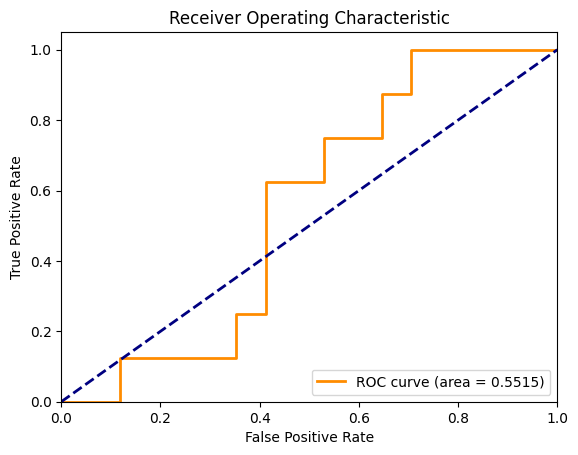

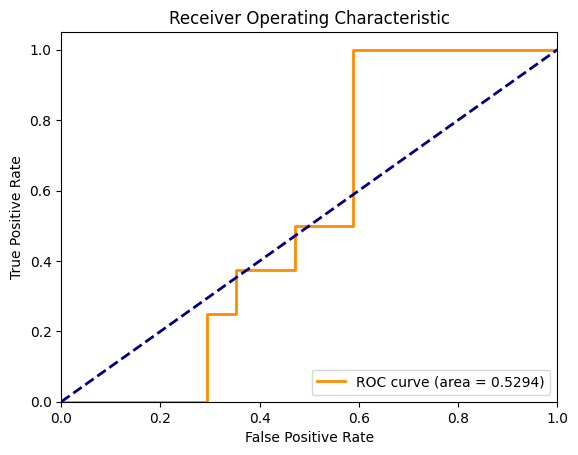

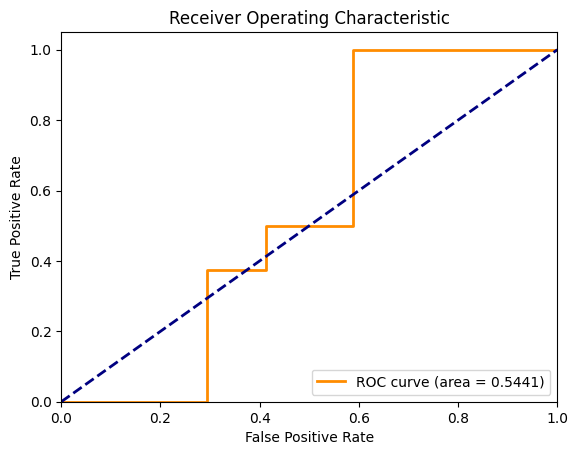

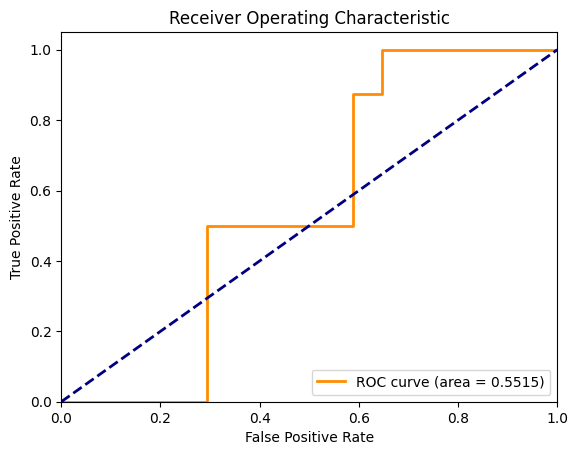

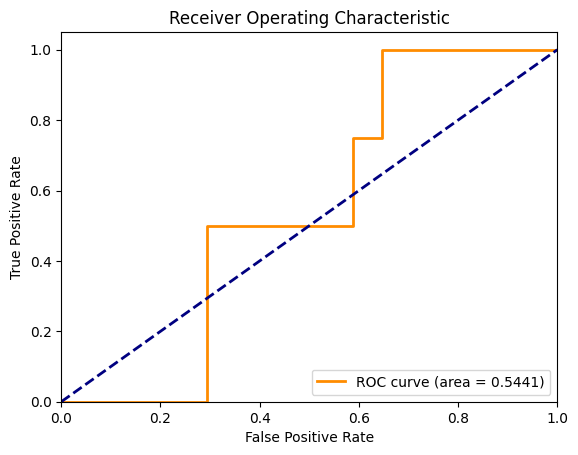

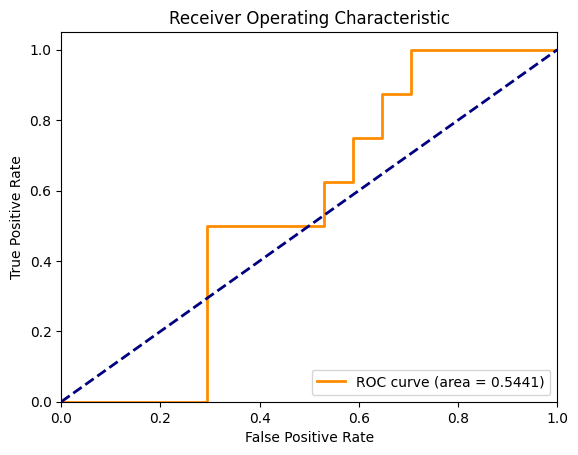

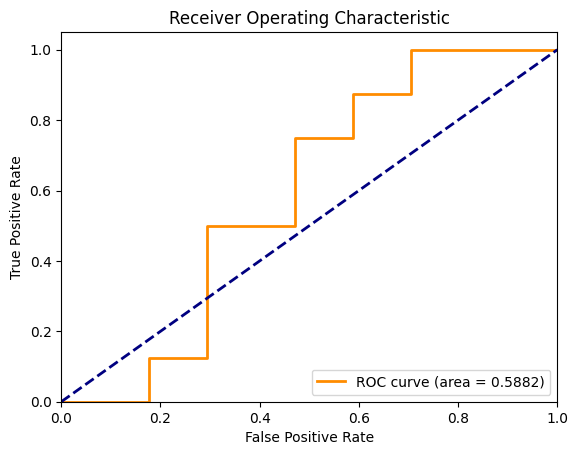

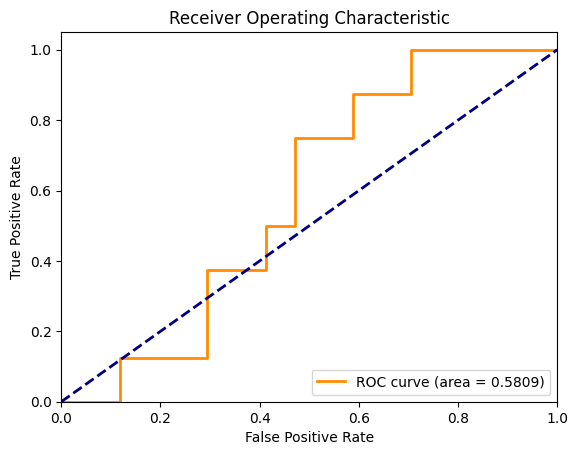

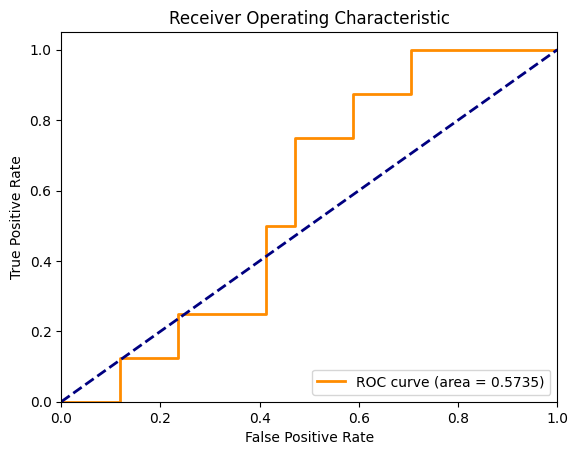

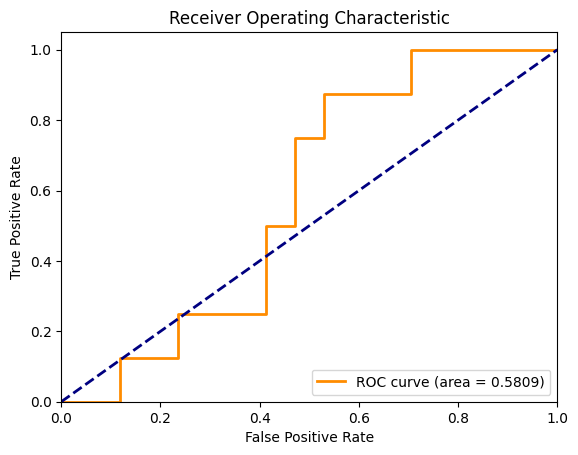

In [10]:
# compute tpr and fpr using sklearn
from sklearn.metrics import roc_curve, auc
import numpy as np

alphas = np.linspace(0, 0.001, 10)

for alpha in alphas:
    #print(f'alpha: {alpha}\n')
    lasso = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    out = lasso.fit(X,Y)
    coefficients = lasso.coef_
    #print(f'cofficients: {coefficients}\n')
    
    coefficients[range(5),range(5)] = 0
    #print(f'np.abs(coefficients.T.flatten()) {np.abs(coefficients.T.flatten())}')
    #print(np.abs(coefficients.T.flatten()).argsort())
    fpr, tpr, thresholds = roc_curve(true_structure, np.abs(coefficients.T.flatten()))
    # compute fpr and tpr for 
    #print(f'fpr: {fpr}\n')
    roc_auc = auc(fpr, tpr)

    # plot roc curve
    import matplotlib.pyplot as plt
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
    # add the random line
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
#     i = input('press enter to continue')
#     if i == 'q':
#         break


In [11]:
# create a linear model with a single layer in pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from torchdiffeq import odeint

class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)
        
    def ode_function(self, t, x):
        return self.linear(x)
        
    def forward(self, x):
        # return self.linear(x)
        # define the forward function as an ODE
        t = torch.linspace(0, 10, 10)

        # Solve the ODE
        solution = odeint(self.ode_function, y0=x, t=t)
        
        return solution[-1]
    

In [12]:
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

class XYDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# Assume df_x and df_y are your DataFrames for features and targets
dataset = XYDataset(X, Y)

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
#train_loader = torch.utils.data.DataLoader(data.values, batch_size=4, shuffle=True, num_workers=2)

alphas = np.linspace(0, 1., 10)
for alpha in alphas:
    # define the training code
    #epochs = 40000
    epochs = 4000
    net = LinearModel(5,5) # +1 for time
    criterion = nn.MSELoss()
    #optimizer = optim.SGD(net.parameters(), lr=1., momentum=0.9)
    optimizer = optim.Adam(net.parameters(), lr=0.01)

    for epoch in range(epochs):
        for i, batch in enumerate(train_loader):
            inputs, labels = batch
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels) + alpha*net.linear.weight.norm(2)**2
            loss.backward()
            optimizer.step()

        print('Epoch %d, loss: %.6f' % (epoch + 1, loss.item()))
        
    th = 1e-8
    weights = net.linear.weight.detach().numpy()
    weights[range(5),range(5)] = 0
    structure = np.abs(weights)>th
    
    # compute tpr and fpr using sklearn
    fpr, tpr, thresholds = roc_curve(true_structure, np.abs(weights.T.flatten()))
    roc_auc = auc(fpr, tpr)

    # plot roc curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    # add the random line
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()



Epoch 1, loss: 2.182032
Epoch 2, loss: 1.106460
Epoch 3, loss: 0.603746
Epoch 4, loss: 0.355613
Epoch 5, loss: 0.223709
Epoch 6, loss: 0.148526
Epoch 7, loss: 0.103129
Epoch 8, loss: 0.074392
Epoch 9, loss: 0.055474
Epoch 10, loss: 0.042598
Epoch 11, loss: 0.033577
Epoch 12, loss: 0.027091
Epoch 13, loss: 0.022318
Epoch 14, loss: 0.018732
Epoch 15, loss: 0.015985
Epoch 16, loss: 0.013845
Epoch 17, loss: 0.012151
Epoch 18, loss: 0.010791
Epoch 19, loss: 0.009685
Epoch 20, loss: 0.008774
Epoch 21, loss: 0.008016
Epoch 22, loss: 0.007380
Epoch 23, loss: 0.006841
Epoch 24, loss: 0.006380
Epoch 25, loss: 0.005983
Epoch 26, loss: 0.005639
Epoch 27, loss: 0.005340
Epoch 28, loss: 0.005077
Epoch 29, loss: 0.004845
Epoch 30, loss: 0.004640
Epoch 31, loss: 0.004457
Epoch 32, loss: 0.004293
Epoch 33, loss: 0.004146
Epoch 34, loss: 0.004014
Epoch 35, loss: 0.003895
Epoch 36, loss: 0.003786
Epoch 37, loss: 0.003687
Epoch 38, loss: 0.003597
Epoch 39, loss: 0.003514
Epoch 40, loss: 0.003438
Epoch 41,

In [ ]:
first = net.linear.weight
first

Parameter containing:
tensor([[-7.6422e-04, -4.2101e-04, -2.1729e-04, -2.3693e-04, -1.0518e-03],
        [-6.7173e-05, -2.0928e-04, -5.8617e-05, -4.0402e-05, -4.9413e-05],
        [-1.1773e-04, -5.8349e-05, -3.9393e-05, -4.3986e-05, -1.6236e-04],
        [-7.3980e-05, -8.1710e-05, -2.9217e-05, -4.1172e-05, -1.3288e-04],
        [-7.6597e-04, -6.5266e-04, -2.5570e-04, -2.7940e-04, -1.1614e-03]],
       requires_grad=True)

In [ ]:
net.linear.weight

Parameter containing:
tensor([[-7.6422e-04, -4.2101e-04, -2.1729e-04, -2.3693e-04, -1.0518e-03],
        [-6.7173e-05, -2.0928e-04, -5.8617e-05, -4.0402e-05, -4.9413e-05],
        [-1.1773e-04, -5.8349e-05, -3.9393e-05, -4.3986e-05, -1.6236e-04],
        [-7.3980e-05, -8.1710e-05, -2.9217e-05, -4.1172e-05, -1.3288e-04],
        [-7.6597e-04, -6.5266e-04, -2.5570e-04, -2.7940e-04, -1.1614e-03]],
       requires_grad=True)

In [ ]:
th = 1e-8
weights = net.linear.weight.detach().numpy()
weights[range(5),range(5)] = 0
structure = np.abs(weights)>th


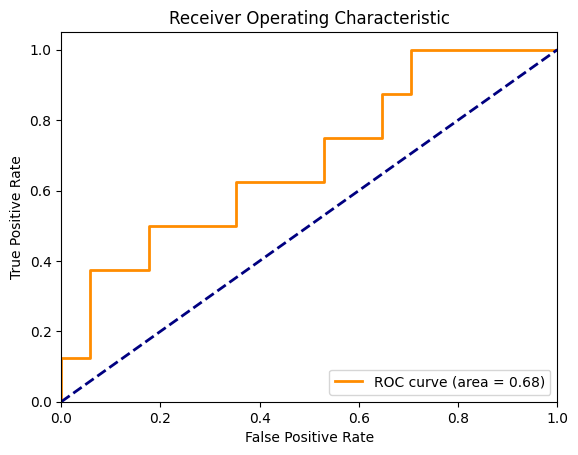

In [ ]:
# compute tpr and fpr using sklearn
from sklearn.metrics import roc_curve, auc
import numpy as np

fpr, tpr, thresholds = roc_curve(true_structure, np.abs(weights.T.flatten()))
roc_auc = auc(fpr, tpr)

# plot roc curve
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# add the random line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
